In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import plotly.graph_objects as go
import matplotlib.pylab as pl

In [2]:
sys.path.append('..')

In [3]:
file_p = '../Data/Data_PopMun/population_municipalities_2.csv'
p_data = pd.read_csv(file_p, delimiter = ';')

In [4]:
def plot_municipality(id_mun, name):
    file_path = '../Data/'+str(id_mun)+'/'+str(id_mun)+'_total.csv'
    file = pd.read_csv(file_path, delimiter=';', index_col=False,
                                parse_dates = ['FIRST_DAY'])
    file_path_2 = '../Data/'+str(id_mun)+'/'+str(id_mun)+'_total_old.csv'
    file_2 = pd.read_csv(file_path_2, delimiter=';', index_col=False,
                                parse_dates = ['FIRST_DAY'])
    file = pd.concat([file,file_2])
    file_grouped = file.copy()
    file_grouped = file_grouped.groupby(['SIN_YEAR'])['CASES'].sum()
    file_grouped = file_grouped.to_frame(name = 'CASES').reset_index()
    pop_data = p_data.copy()
    pop_data = pop_data[pop_data['Municipio'] == 355030]
    pop_data = pop_data.transpose()
    pop_data = pop_data.tail(-1)
    pop_data = pop_data.iloc[:,0]
    pop_data = pop_data.to_frame(name = 'POP').reset_index()
    file_grouped['CASES/100POP'] = (file_grouped['CASES']/pop_data['POP'])*(10**5)
    plt.plot(file_grouped['SIN_YEAR'],file_grouped['CASES/100POP'],'-o',color = 'k',linewidth = 3)
    plt.xlabel('Year',fontsize = 14)
    plt.xticks(np.arange(min(file_grouped['SIN_YEAR'].unique()),max(file_grouped['SIN_YEAR'].unique())+1,3))
    plt.ylabel('Cases/100.000 inhab',fontsize = 14)
    plt.title('Cases/100.inhab 2000-2021 for '+name, fontsize = 14)
    plt.grid()
    plt.show()

In [5]:
id_municipalities = [355030, 330455, 520870, 530010, 230440, 310620, 354340, 354980]
names = ['SP','RJ','Goiania','DF','Fortaleza','Belo Horizonte', 'Rib. Preto', 'SJ do Rio Preto']

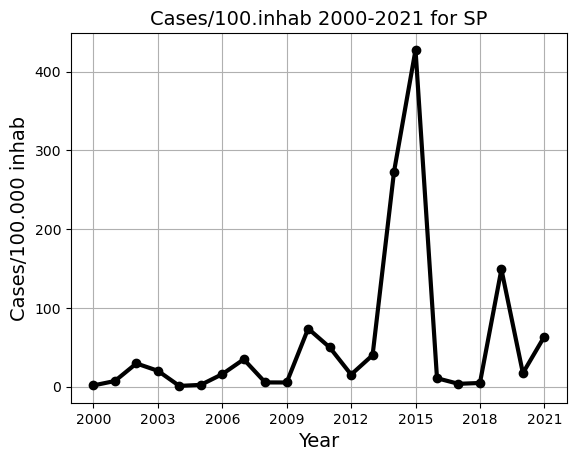

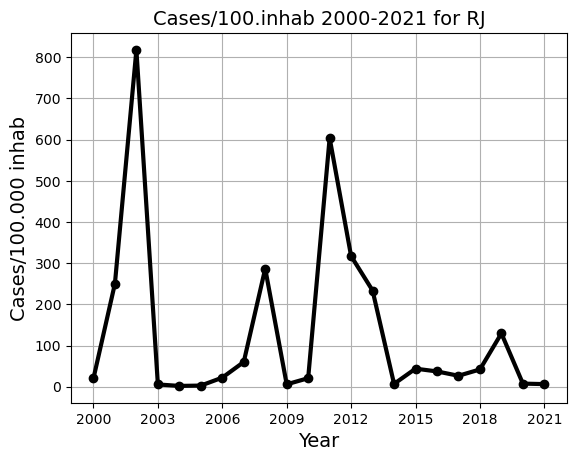

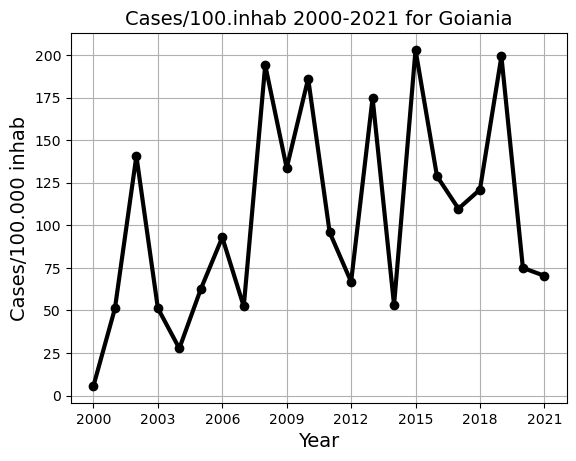

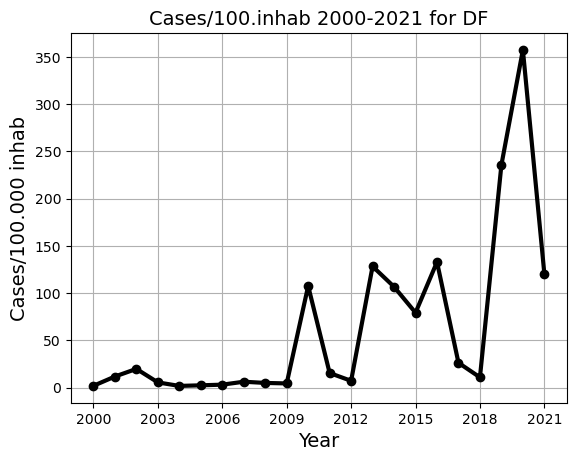

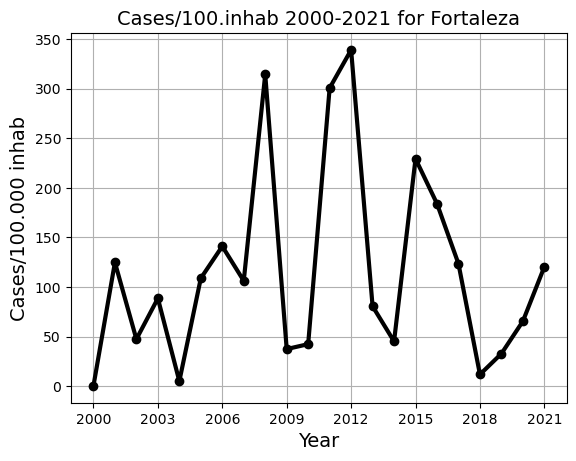

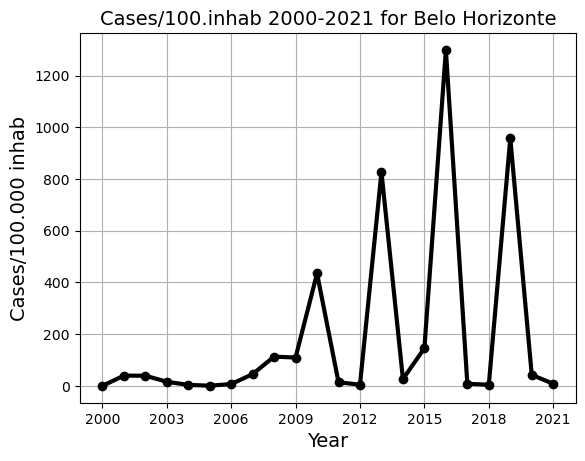

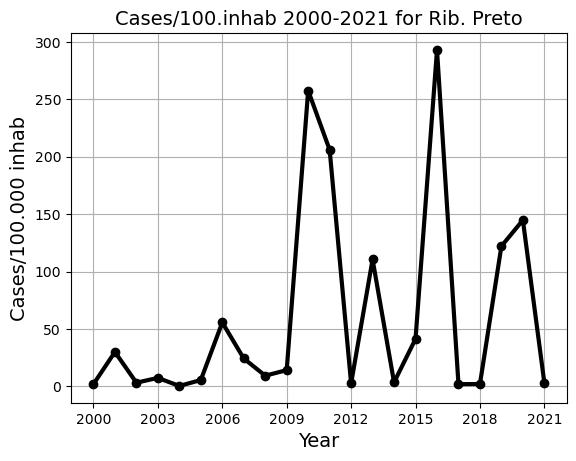

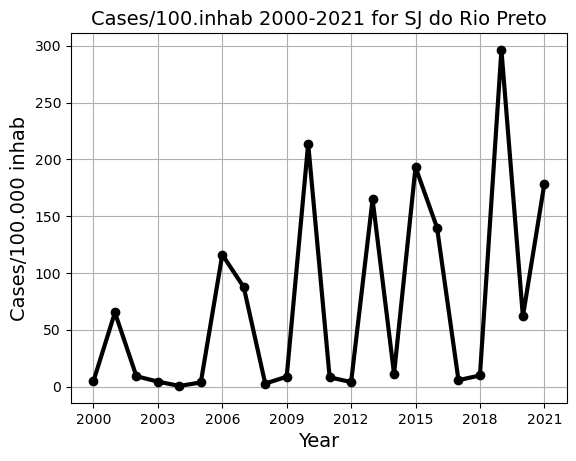

In [6]:
counter = 0
for id_mun in id_municipalities:
    plot_municipality(id_mun,names[counter])
    counter = counter + 1